# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

# Mounting google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# LOgistic Regression

In [3]:
df = pd.read_csv("/content/drive/My Drive/AI/diabetes2.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Set target and features

In [5]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [6]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.duplicated().sum()  # CHECKING FOR DUPLICATES


np.int64(0)

In [8]:
df.isna().sum() # CHECKING FOR NULL VALUES


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
X_encoded = pd.get_dummies(X, drop_first=True)

In [11]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
print("\nTraining the Logistic Regression model...")
model = LogisticRegression(solver='liblinear', random_state=42)


Training the Logistic Regression model...


In [14]:
model.fit(X_train, y_train)
print("Model training complete!")

Model training complete!


In [15]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities of the positive class

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7597


In [21]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[83 16]
 [21 34]]


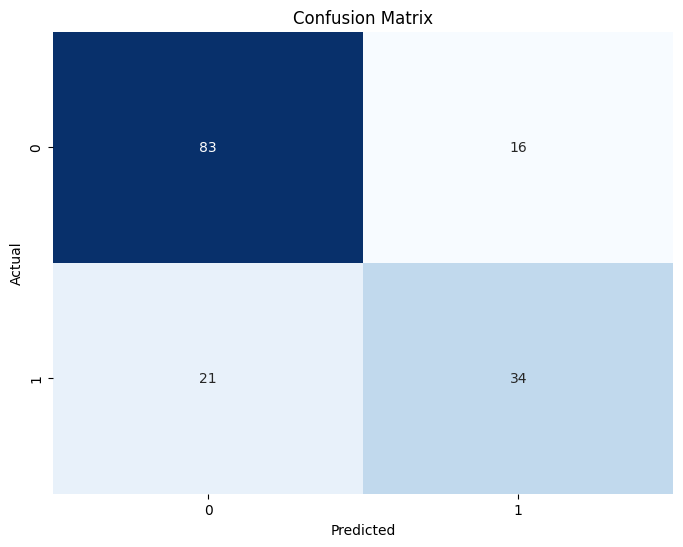

In [23]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [25]:
print("\n--- Feature Coefficients (Importance) ---")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients['Absolute Coefficient'] = abs(coefficients['Coefficient'])
coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)
print(coefficients)


--- Feature Coefficients (Importance) ---
                    Feature  Coefficient  Absolute Coefficient
6  DiabetesPedigreeFunction     0.448016              0.448016
0               Pregnancies     0.068220              0.068220
5                       BMI     0.063572              0.063572
1                   Glucose     0.025592              0.025592
7                       Age     0.023939              0.023939
2             BloodPressure    -0.018383              0.018383
3             SkinThickness     0.001774              0.001774
4                   Insulin    -0.000976              0.000976


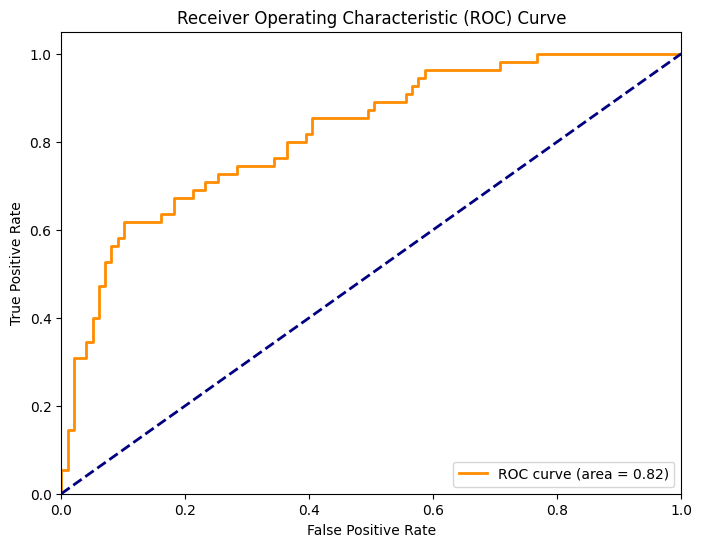


--- End of Logistic Regression Analysis ---


In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

if len(model.classes_) == 2: # Only for binary classification
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("\nROC Curve is typically for binary classification problems.")


print("\n--- End of Logistic Regression Analysis ---")

# END OF LOGISTIC